In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree


In [42]:
data=pd.read_csv('../Dataset/heart.csv')


In [43]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [44]:
LabelEncoder = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
      data[col] = LabelEncoder.fit_transform(data[col])

In [45]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [46]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
scalers = {'MinMaxScaler': MinMaxScaler(), 'StandardScaler': StandardScaler()}


Using MinMaxScaler...
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.88      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184

Accuracy Score: 0.8478260869565217


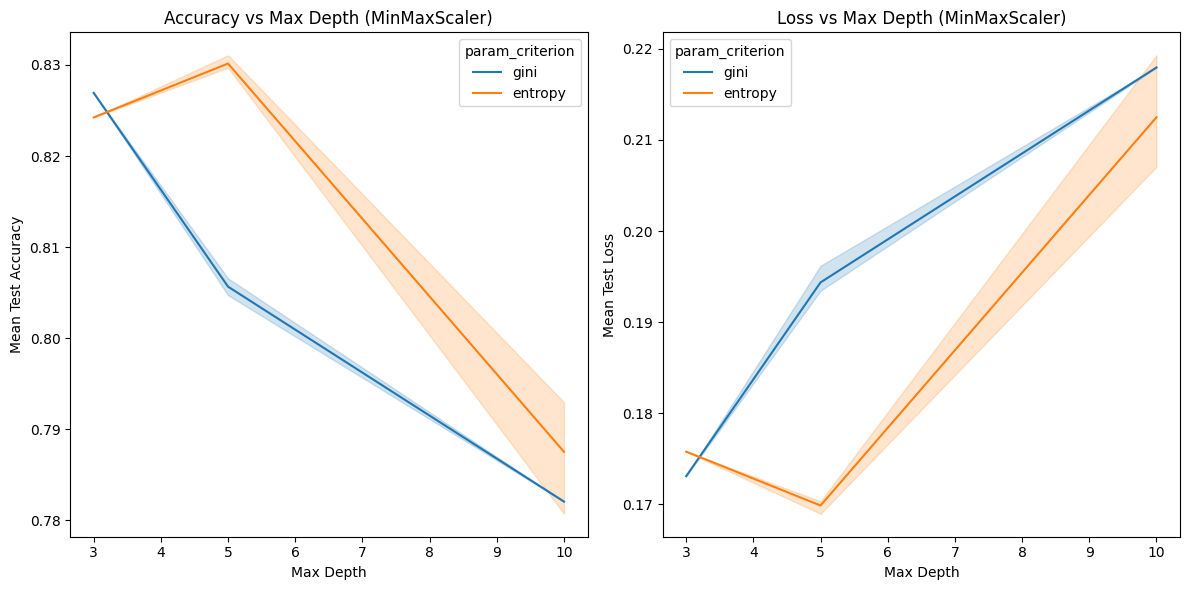

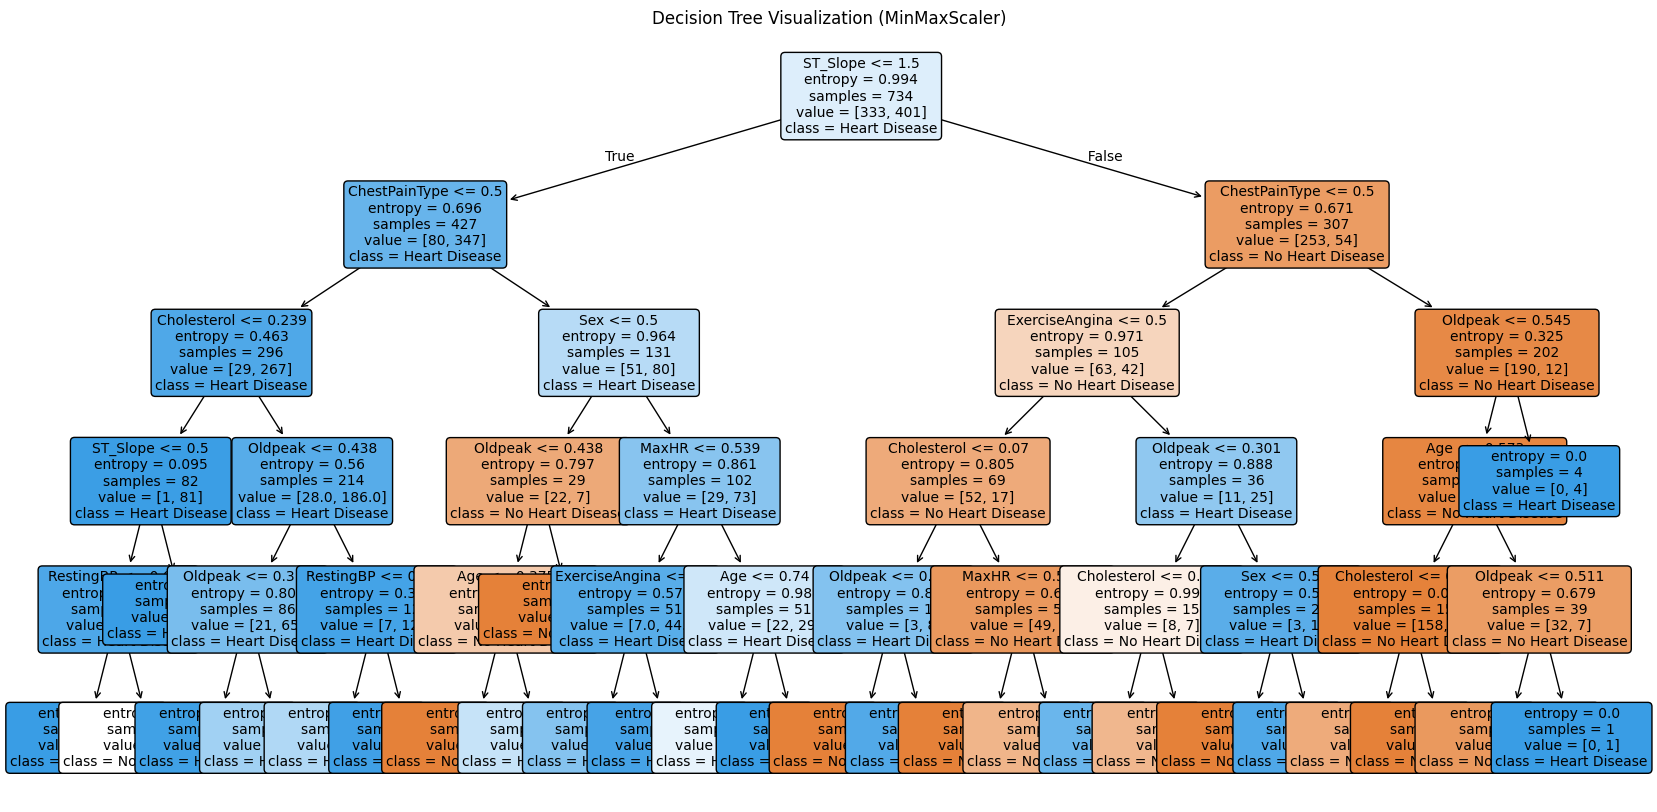

|--- ST_Slope <= 1.50
|   |--- ChestPainType <= 0.50
|   |   |--- Cholesterol <= 0.24
|   |   |   |--- ST_Slope <= 0.50
|   |   |   |   |--- RestingBP <= 0.63
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- RestingBP >  0.63
|   |   |   |   |   |--- class: 0
|   |   |   |--- ST_Slope >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Cholesterol >  0.24
|   |   |   |--- Oldpeak <= 0.44
|   |   |   |   |--- Oldpeak <= 0.31
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Oldpeak >  0.31
|   |   |   |   |   |--- class: 1
|   |   |   |--- Oldpeak >  0.44
|   |   |   |   |--- RestingBP <= 0.56
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- RestingBP >  0.56
|   |   |   |   |   |--- class: 1
|   |--- ChestPainType >  0.50
|   |   |--- Sex <= 0.50
|   |   |   |--- Oldpeak <= 0.44
|   |   |   |   |--- Age <= 0.38
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  0.38
|   |   |   |   |   |--- class: 1
|   |   |   |--- Oldpeak >  0.44
|   |   |   |   |--- class:

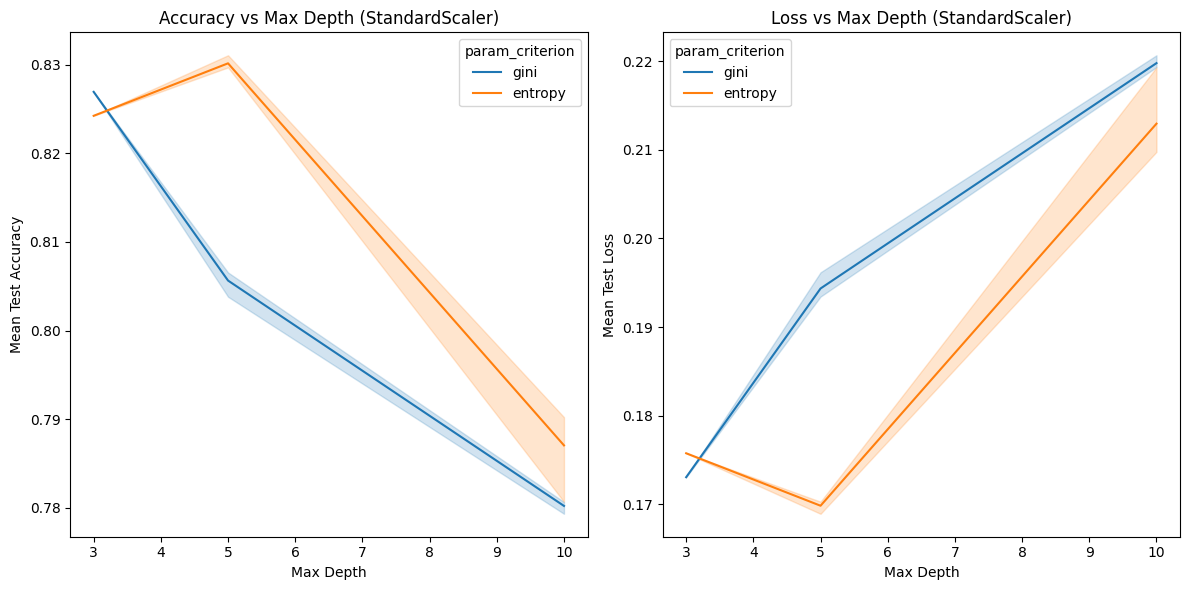

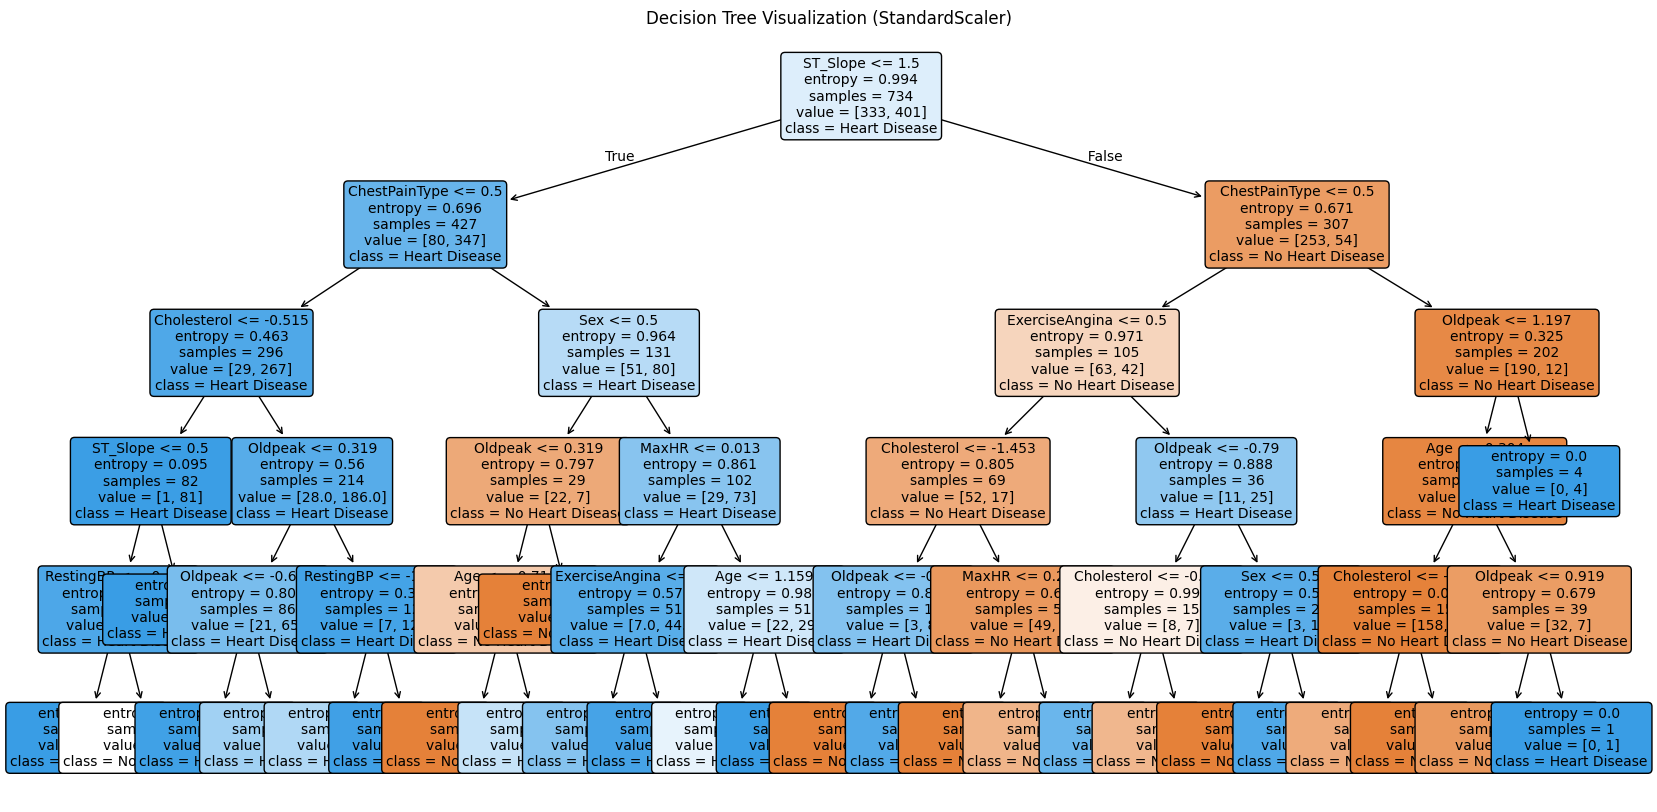

|--- ST_Slope <= 1.50
|   |--- ChestPainType <= 0.50
|   |   |--- Cholesterol <= -0.51
|   |   |   |--- ST_Slope <= 0.50
|   |   |   |   |--- RestingBP <= -0.41
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- RestingBP >  -0.41
|   |   |   |   |   |--- class: 0
|   |   |   |--- ST_Slope >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Cholesterol >  -0.51
|   |   |   |--- Oldpeak <= 0.32
|   |   |   |   |--- Oldpeak <= -0.70
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Oldpeak >  -0.70
|   |   |   |   |   |--- class: 1
|   |   |   |--- Oldpeak >  0.32
|   |   |   |   |--- RestingBP <= -1.09
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- RestingBP >  -1.09
|   |   |   |   |   |--- class: 1
|   |--- ChestPainType >  0.50
|   |   |--- Sex <= 0.50
|   |   |   |--- Oldpeak <= 0.32
|   |   |   |   |--- Age <= -0.71
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  -0.71
|   |   |   |   |   |--- class: 1
|   |   |   |--- Oldpeak >  0.32
|   |   |   |   |

In [ ]:
for scaler_name, scaler in scalers.items():
    print(f"Using {scaler_name}...")
    
    # Scale numerical features
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])
    
    # Hyperparameter tuning
    param_grid = {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    
    # Evaluation
    y_pred = best_model.predict(X_test_scaled)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    
    results = pd.DataFrame(grid_search.cv_results_)
    plt.figure(figsize=(12, 6))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    sns.lineplot(x=results['param_max_depth'], y=results['mean_test_score'], hue=results['param_criterion'])
    plt.title(f'Accuracy vs Max Depth ({scaler_name})')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Test Accuracy')
    
    # Plot loss (1 - accuracy)
    plt.subplot(1, 2, 2)
    sns.lineplot(x=results['param_max_depth'], y=1 - results['mean_test_score'], hue=results['param_criterion'])
    plt.title(f'Loss vs Max Depth ({scaler_name})')
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Test Loss')
    
    plt.tight_layout()
    plt.show()

    # Visualize decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(best_model, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True, rounded=True, fontsize=10)
    plt.title(f"Decision Tree Visualization ({scaler_name})")
    plt.show()
    
    # Print the text representation of the decision tree
    tree_rules = export_text(best_model, feature_names=list(X.columns))
    print(tree_rules)

In [49]:
X.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')